In [1]:
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data from file
df=pd.read_csv ("SALES_REPORT-7_28_21-10_24_21.csv")
df.head()

,Mkt,Date,ASIN,Title,Category 1,Category 2,Category 3,Product Type,Purchased,Cancelled,Returned,Revenue,Royalties,Currency
0,.it,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,Men,3XL,White,Standard t-shirt,1,0,0,16.99,2.09,EUR
1,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Black,Standard t-shirt,1,0,0,16.99,2.09,EUR
2,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Navy,Standard t-shirt,1,0,0,16.99,2.09,EUR
3,.it,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,Men,Large,White,Standard t-shirt,1,0,0,16.99,2.09,EUR
4,.it,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,Men,Medium,Black,Standard t-shirt,1,0,0,16.99,2.09,EUR


In [3]:
df.shape

(1215, 14)

In [4]:
df.pivot_table (index="Mkt", columns="Currency", values= "Purchased" ,aggfunc='sum', fill_value=0)

Currency,EUR,GBP,JPY,USD
Mkt,,,,
.co.jp,0,0,54,0
.co.uk,0,57,0,0
.com,0,0,0,339
.de,301,0,0,0
.es,53,0,0,0
.fr,108,0,0,0
.it,243,0,0,0


In [5]:
#delete the none relevant feature/column
df= df.drop(columns=['Revenue', 'Royalties', 'Currency'])
df.rename(columns={"Category 1": "Gender", "Category 2": "Size", "Category 3": "Colour"}, inplace=True)
df.head()

,Mkt,Date,ASIN,Title,Gender,Size,Colour,Product Type,Purchased,Cancelled,Returned
0,.it,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,Men,3XL,White,Standard t-shirt,1,0,0
1,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Black,Standard t-shirt,1,0,0
2,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Navy,Standard t-shirt,1,0,0
3,.it,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,Men,Large,White,Standard t-shirt,1,0,0
4,.it,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,Men,Medium,Black,Standard t-shirt,1,0,0


In [6]:
# summerise ("purchased_sum")- how many unit were actully sold (the number of purches minus the number
# of the cancelled and Return product)

df["purchased_sum"] = df["Purchased"]-df["Cancelled"]-df["Returned"]
df.head()

,Mkt,Date,ASIN,Title,Gender,Size,Colour,Product Type,Purchased,Cancelled,Returned,purchased_sum
0,.it,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,Men,3XL,White,Standard t-shirt,1,0,0,1
1,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Black,Standard t-shirt,1,0,0,1
2,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Navy,Standard t-shirt,1,0,0,1
3,.it,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,Men,Large,White,Standard t-shirt,1,0,0,1
4,.it,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,Men,Medium,Black,Standard t-shirt,1,0,0,1


In [7]:
#delete the none relevant feature/column 
df.drop(columns=['Purchased', 'Cancelled', 'Returned'], inplace=True)  
df.head()


,Mkt,Date,ASIN,Title,Gender,Size,Colour,Product Type,purchased_sum
0,.it,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,Men,3XL,White,Standard t-shirt,1
1,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Black,Standard t-shirt,1
2,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Navy,Standard t-shirt,1
3,.it,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,Men,Large,White,Standard t-shirt,1
4,.it,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,Men,Medium,Black,Standard t-shirt,1


In [8]:
# purchased_sum according to product type
df.groupby("Product Type")["purchased_sum"].sum()

Product Type
Long sleeve t-shirt     52
Premium t-shirt          4
Pullover hoodie         93
Raglan                  14
Standard t-shirt       755
Sweatshirt              15
Tank top                11
Throw pillows            0
Tote bag                 3
V-neck t-shirt          20
Zip hoodie              26
Name: purchased_sum, dtype: int64

In [9]:
# create data frame with product number that available in the store according to product type
Product={"Product Type":["Long sleeve t-shirt","Premium t-shirt", "Pullover hoodie","Raglan","Standard t-shirt"
                         , "Sweatshirt","Tank top","Throw pillows", "Tote bag", "V-neck t-shirt","Zip hoodie"], 
             "store_quantity":[10715, 2022,9818, 9014,13570,10111, 9126,94,151,9162,9604],}
df_Product= pd.DataFrame(Product)
df_Product


,Product Type,store_quantity
0,Long sleeve t-shirt,10715
1,Premium t-shirt,2022
2,Pullover hoodie,9818
3,Raglan,9014
4,Standard t-shirt,13570
5,Sweatshirt,10111
6,Tank top,9126
7,Throw pillows,94
8,Tote bag,151
9,V-neck t-shirt,9162


In [10]:
#combine the 2 dataframes
df_combine=pd.merge(df_Product, df.groupby("Product Type")["purchased_sum"].sum(), on="Product Type")
df_combine

,Product Type,store_quantity,purchased_sum
0,Long sleeve t-shirt,10715,52
1,Premium t-shirt,2022,4
2,Pullover hoodie,9818,93
3,Raglan,9014,14
4,Standard t-shirt,13570,755
5,Sweatshirt,10111,15
6,Tank top,9126,11
7,Throw pillows,94,0
8,Tote bag,151,3
9,V-neck t-shirt,9162,20


In [11]:
# calculate the percentage of sells 

df_combine["%buy"] = (df_combine["purchased_sum"]/df_combine["store_quantity"])*100
df_combine.sort_values ("%buy", inplace=True, ascending=False)
df_combine

,Product Type,store_quantity,purchased_sum,%buy
4,Standard t-shirt,13570,755,5.563744
8,Tote bag,151,3,1.986755
2,Pullover hoodie,9818,93,0.947240
0,Long sleeve t-shirt,10715,52,0.485301
10,Zip hoodie,9604,26,0.270721
9,V-neck t-shirt,9162,20,0.218293
1,Premium t-shirt,2022,4,0.197824
3,Raglan,9014,14,0.155314
5,Sweatshirt,10111,15,0.148353
6,Tank top,9126,11,0.120535


In [12]:
#same for the country

country={"Mkt":[".co.jp",".co.uk", ".com",".de",".es", ".fr",".it"], 
             "store_quantity":[7405, 11058,17294, 11972,12016,11933, 11709],}
df_country= pd.DataFrame(country)

df_combine=pd.merge(df_country, df.groupby("Mkt")["purchased_sum"].sum(), on="Mkt")

df_combine["%buy"] = (df_combine["purchased_sum"]/df_combine["store_quantity"])*100

df_combine.sort_values ("%buy", inplace=True, ascending=False)

df_combine


,Mkt,store_quantity,purchased_sum,%buy
3,.de,11972,255,2.129970
6,.it,11709,222,1.895977
2,.com,17294,279,1.613276
5,.fr,11933,92,0.770971
0,.co.jp,7405,48,0.648211
1,.co.uk,11058,53,0.479291
4,.es,12016,44,0.366178


In [13]:
df.pivot_table (index=["Mkt"], columns=["Product Type"],aggfunc='sum', fill_value=0)


purchased_sum                                         \
Product Type Long sleeve t-shirt Premium t-shirt Pullover hoodie Raglan   
Mkt                                                                       
.co.jp                         7               0               1      0   
.co.uk                         4               0               7      1   
.com                          14               4              13      5   
.de                           12               0              23      1   
.es                            1               0               8      0   
.fr                            3               0              11      5   
.it                           11               0              30      2   

                                                                          \
Product Type Standard t-shirt Sweatshirt Tank top Throw pillows Tote bag   
Mkt                                                                        
.co.jp                     39          1        0             0        0   
.co.uk                     32          1        1             0        0   
.com                      231          1       -1             0        3   
.de                       207          4        4             0        0   
.es                        29          1        0             0        0   
.fr                        64          1        5             0        0   
.it                       153          6        2             0        0   

                                        
Product Type V-neck t-shirt Zip hoodie  
Mkt                                     
.co.jp                    0          0  
.co.uk                    2          5  
.com                      3          6  
.de                       2          2  
.es                       2          3  
.fr                       3          0  
.it                       8         10

In [14]:
#same for the topic

# a function to categorize the shirt topic according to key words in the title
def map_title(text):
    if text:
        if "NASA" in text:
            return "NASA"
        elif "Van Gogh" in text or "Vinci" in text or "Michelangelo" in text:
            return "ART"
        elif "LGBT" in text:
            return "LGBT"
        else:
            return "Other"

In [15]:
df['Topic'] = df['Title'].apply(lambda x: map_title(x))
df.head()

,Mkt,Date,ASIN,Title,Gender,Size,Colour,Product Type,purchased_sum,Topic
0,.it,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,Men,3XL,White,Standard t-shirt,1,ART
1,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Black,Standard t-shirt,1,NASA
2,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Navy,Standard t-shirt,1,NASA
3,.it,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,Men,Large,White,Standard t-shirt,1,ART
4,.it,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,Men,Medium,Black,Standard t-shirt,1,NASA


In [16]:
topic={"Topic":["NASA","ART", "LGBT"], 
             "store_quantity":[39782, 22052, 5399],}

df_topic= pd.DataFrame(topic)

df_combine=pd.merge(df_topic, df.groupby("Topic")["purchased_sum"].sum(), on="Topic")

df_combine["%buy"] = (df_combine["purchased_sum"]/df_combine["store_quantity"])*100

df_combine.sort_values ("%buy", inplace=True, ascending=False)

df_combine

,Topic,store_quantity,purchased_sum,%buy
0,NASA,39782,487,1.224172
1,ART,22052,240,1.088337
2,LGBT,5399,20,0.370439


In [17]:
#we want to predict if the buyer is a man or a woman, so we want to dataset to contain only
#the index in which the gender == men/women

df = df[(df["Gender"] == "Men") | (df["Gender"] == "Women")]
df = df[(df["purchased_sum"] > 0)]

In [18]:
df.head()

,Mkt,Date,ASIN,Title,Gender,Size,Colour,Product Type,purchased_sum,Topic
0,.it,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,Men,3XL,White,Standard t-shirt,1,ART
1,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Black,Standard t-shirt,1,NASA
2,.it,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,Men,XL,Navy,Standard t-shirt,1,NASA
3,.it,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,Men,Large,White,Standard t-shirt,1,ART
4,.it,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,Men,Medium,Black,Standard t-shirt,1,NASA


In [19]:
# lets check if the topic can suggest the gender
pd.crosstab(df["Topic"], df["Gender"], normalize="index",margins=True, margins_name="column")

Gender,Men,Women
Topic,,
ART,0.653465,0.346535
LGBT,0.722222,0.277778
NASA,0.842105,0.157895
Other,0.686099,0.313901
column,0.739011,0.260989


In [20]:
# lets check if the market can suggest the gender
pd.crosstab(df["Mkt"], df["Gender"], normalize="index",margins=True, margins_name="column")

Gender,Men,Women
Mkt,,
.co.jp,0.942857,0.057143
.co.uk,0.638889,0.361111
.com,0.752252,0.247748
.de,0.648241,0.351759
.es,0.766667,0.233333
.fr,0.728571,0.271429
.it,0.823529,0.176471
column,0.739011,0.260989


In [21]:
# lets check if the size can suggest the gender
pd.crosstab(df["Size"], df["Gender"], normalize="index",margins=True, margins_name="column")

Gender,Men,Women
Size,,
2XL,0.792453,0.207547
3XL,0.871429,0.128571
Large,0.812865,0.187135
Medium,0.637306,0.362694
Small,0.646154,0.353846
XL,0.801802,0.198198
column,0.739011,0.260989


In [22]:
# lets check if the shirt colour can suggest the gender
pd.crosstab(df["Colour"], df["Gender"], normalize="index",margins=True, margins_name="column")

Gender,Men,Women
Colour,,
Asphalt,1.000000,0.000000
Baby Blue,0.461538,0.538462
Black,0.747664,0.252336
Black/Athletic Heather,1.000000,0.000000
Black/White,0.500000,0.500000
Brown,1.000000,0.000000
Cranberry,0.500000,0.500000
Dark Heather,0.714286,0.285714
Forest Green,0.000000,1.000000


In [23]:
# lets check if the shirt type can suggest the gender
pd.crosstab(df["Product Type"], df["Gender"], normalize="index",margins=True, margins_name="column")

Gender,Men,Women
Product Type,,
Premium t-shirt,0.625000,0.375000
Raglan,0.714286,0.285714
Standard t-shirt,0.777948,0.222052
Tank top,0.652174,0.347826
V-neck t-shirt,0.000000,1.000000
column,0.739011,0.260989


In [24]:
#encode the categorial data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

cols_for_model = ["Topic","Mkt", "Size","Colour","Product Type"]

In [25]:
labelencoder=LabelEncoder()
df["Gender"] = labelencoder.fit_transform(df["Gender"])

In [26]:
model_df = pd.get_dummies(df, columns=cols_for_model)
model_df.head()

,Date,ASIN,Title,Gender,purchased_sum,Topic_ART,Topic_LGBT,Topic_NASA,Topic_Other,Mkt_.co.jp,...,Colour_Royal Blue/White,Colour_Sapphire,Colour_Silver,Colour_Slate,Colour_White,Product Type_Premium t-shirt,Product Type_Raglan,Product Type_Standard t-shirt,Product Type_Tank top,Product Type_V-neck t-shirt
0,7/28/21,B08TB5YL1Q,Uomo vitruviano Leonardo da Vinci Bianco e Ner...,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7/28/21,B08WPWQ78L,NASA Apollo Disegni Tecnici E Schemi Del Proge...,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7/28/21,B0977Y6MJT,Capolavori d'arte di Van Gogh - Notte stellata...,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,7/29/21,B08GBYH4V7,NASA Illustrazione della delle stelle nel sist...,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


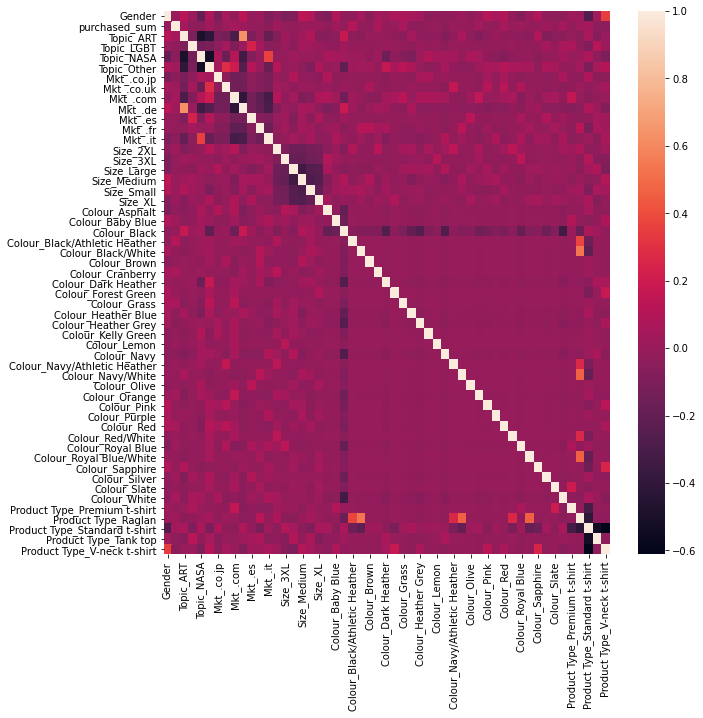

In [27]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(model_df.corr())

In [28]:
# make a list for all the X variable
final_cols_for_model = []
for iCol in cols_for_model:
    final_cols_for_model = final_cols_for_model + [col for col in model_df if col.startswith(iCol)]

In [29]:
# define X and Y
from sklearn.model_selection import train_test_split

x = model_df[final_cols_for_model]
y = model_df["Gender"]

# split for test and train
x_train, x_test, y_train, y_test= train_test_split (x, y, test_size=0.2, random_state=0)


In [30]:
#Importing all the required classifier models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [31]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SupportVectorClassifier',SVC()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('GaussianNBClassifier',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))

In [32]:
for name,model in models:
    model.fit(x_train,y_train)
    ts_score = model.score(x_test,y_test)
    pred = model.predict(x_test)
    print("\n\n", name)
    classification_report(y_test, pred)
    print(classification_report(y_test, pred, target_names=["Men","Women"]))
    print("Train accuracy rate:",model.score(x_train,y_train),"\nTest accuracy rate:",ts_score)
    cm = confusion_matrix(y_test,pred)
    print("Confusion Matrix\n",cm)



 LogisticRegression
              precision    recall  f1-score   support

         Men       0.80      0.98      0.88       112
       Women       0.75      0.18      0.29        34

    accuracy                           0.79       146
   macro avg       0.77      0.58      0.58       146
weighted avg       0.79      0.79      0.74       146

Train accuracy rate: 0.781786941580756 
Test accuracy rate: 0.7945205479452054
Confusion Matrix
 [[110   2]
 [ 28   6]]


 DecisionTreeClassifier
              precision    recall  f1-score   support

         Men       0.78      0.91      0.84       112
       Women       0.38      0.18      0.24        34

    accuracy                           0.74       146
   macro avg       0.58      0.54      0.54       146
weighted avg       0.69      0.74      0.70       146

Train accuracy rate: 0.8676975945017182 
Test accuracy rate: 0.7397260273972602
Confusion Matrix
 [[102  10]
 [ 28   6]]


 SupportVectorClassifier
              precision    rec

(0.0, 1.0)

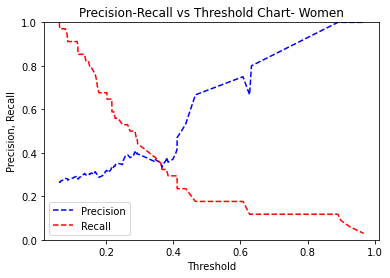

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test) 

probs_y=lr.predict_proba(x_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
    
import sklearn.metrics as metrics

pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart- Women")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])